https://morvanzhou.github.io/tutorials/machine-learning/torch/3-02-classification/

# 要点 

这次我们也是用最简单的途径来看看神经网络是怎么进行事物的分类.

# 建立数据集

我们创建一些假数据来模拟真实的情况. 比如两个二次分布的数据, 不过他们的均值都不一样.

In [1]:
%matplotlib inline 
import torch
import matplotlib.pyplot as plt

#### 构建数据

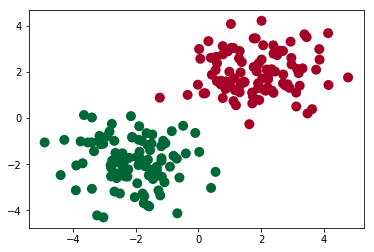

In [4]:
n_data = torch.ones(100,2)  #数据的基本形态
x0 = torch.normal(2*n_data,1) #类型0 x data (tensor), shape=(100,2)
y0 = torch.zeros(100) #类型0 y data (tensor), shape=(100,1)
x1 = torch.normal(-2*n_data,1) #类型1 x data (tensor),shape=(100,2)
y1 = torch.ones(100) #类型1 y data (tensor), shape=(100,1)

# 注意x,y数据的形式市一定要像下面一样（torch.cat是在合并数据0）
x = torch.cat((x0,x1),0).type(torch.FloatTensor) # FloatTensor = 32-bit floating
y = torch.cat((y0,y1),0).type(torch.LongTensor) # Floattensor = 64-bit integer

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

# 画图
#plt.scatter(x.data.numpy(), y.data.numpy())
#plt.show()

# 建立神经网络

建立一个神经网络我们可以直接运用 torch 中的体系. 先定义所有的层属性(\_\_init\_\_()), 然后再一层层搭建(forward(x))层于层的关系链接. 这个和我们在前面 regression 的时候的神经网络基本没差.

In [17]:
import torch
import torch.nn.functional as F #激励函数

class Net(torch.nn.Module): #继承torch的Module
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__() #继承__init__功能
        self.hidden = torch.nn.Linear(n_feature,n_hidden) #隐藏层线性输出
        self.out = torch.nn.Linear(n_hidden,n_output) #输出层线性输出
        
    def forward(self,x):
        #正向传播输出值，神经网络分析出输出值
        x = F.relu(self.hidden(x)) #激励函数（隐藏层的线性值）
        x = self.out(x)  #输出值，但是这个不是预测值，预测值还需要再另外计算
        return x

net = Net(n_feature=2,n_hidden=10,n_output=2) #几个类别就有几个output

print(net)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


# 训练网络

训练步骤如下：

In [18]:
#optimizer是训练的工具
optimizer = torch.optim.SGD(net.parameters(),lr=0.02) #传入net的所有参数，学习率
# 算误差的时候, 注意真实值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是预测值是2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss()

for t in range(100):
    out = net(x) #给net训练数据x，输出分析值
    
    loss = loss_func(out,y) #计算两者的误差
    
    optimizer.zero_grad() #清空上一步的残余更新参数值
    loss.backward() #误差反向传播，计算参数更新值
    optimizer.step() #将参数更新值施加到net的parameters上

# 可视化训练过程

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


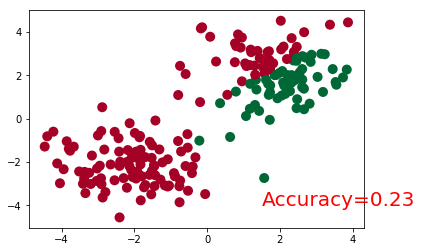

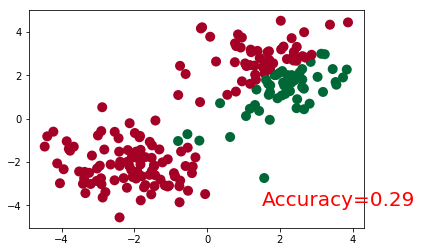

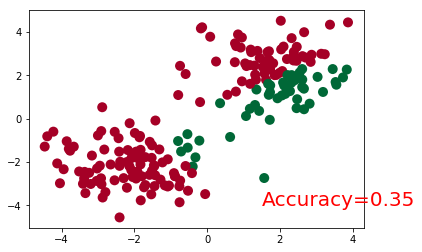

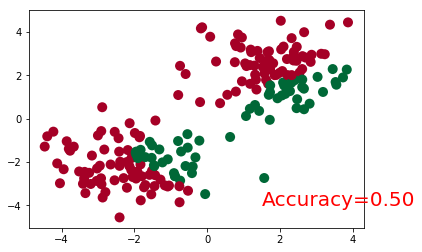

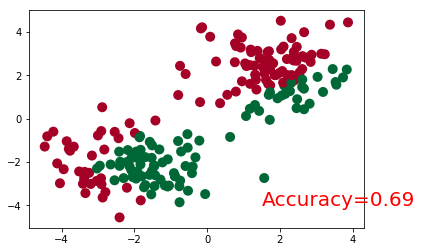

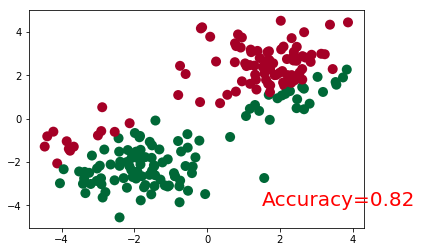

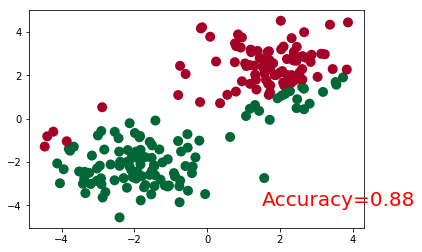

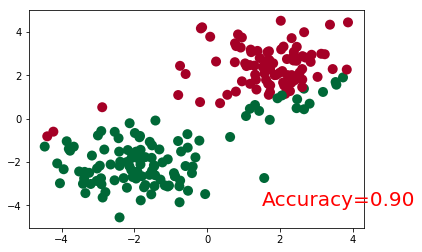

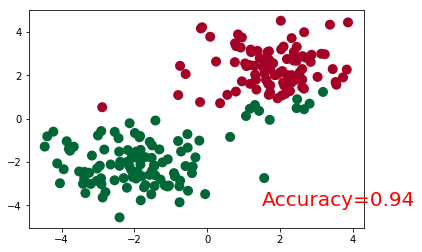

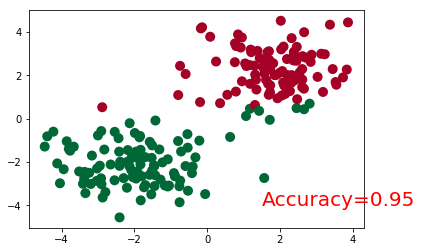

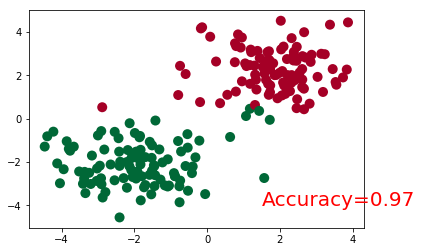

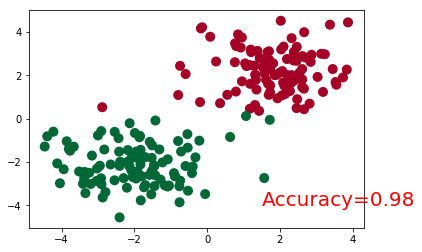

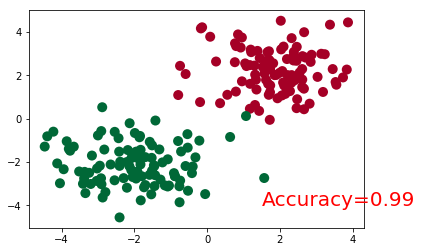

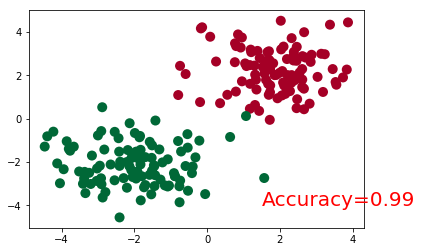

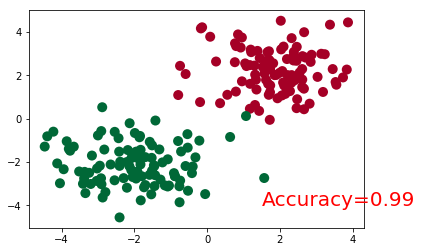

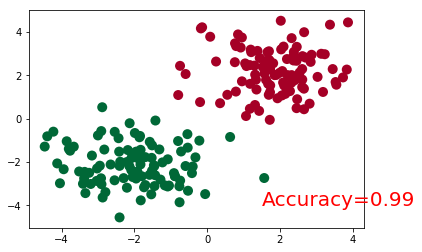

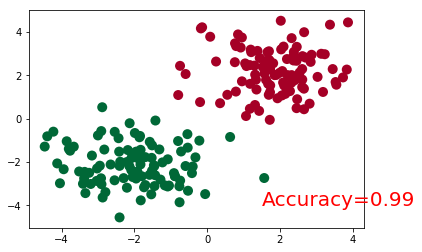

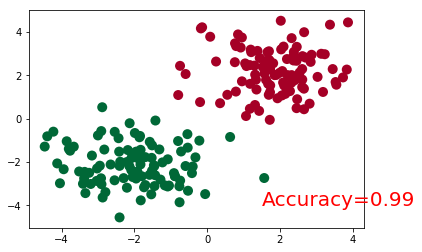

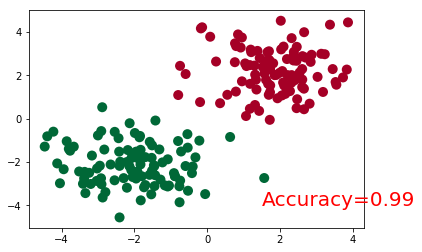

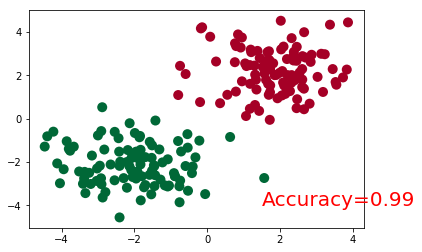

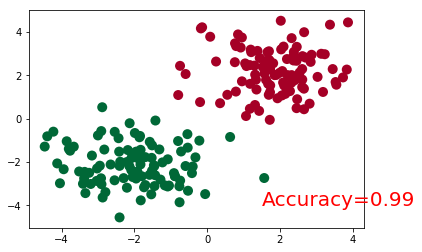

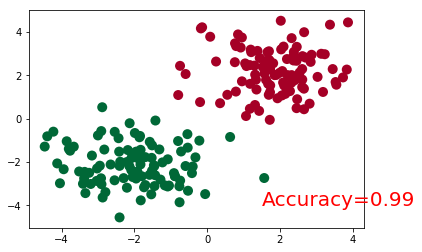

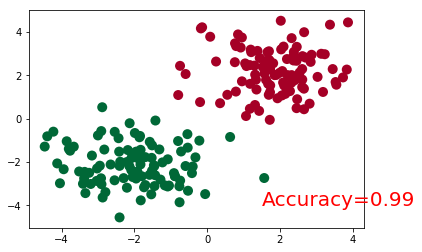

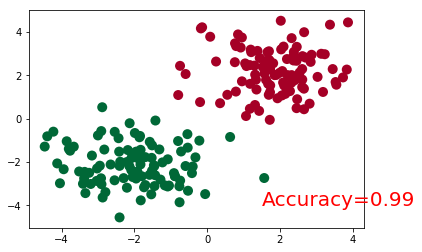

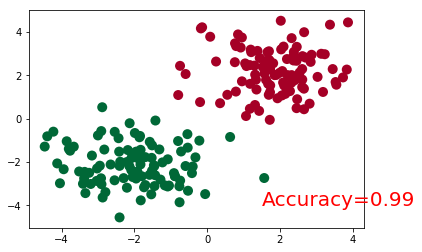

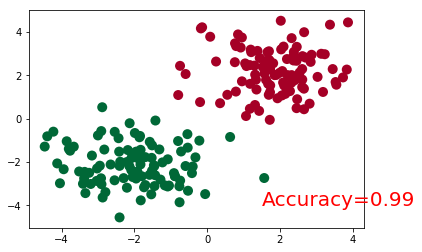

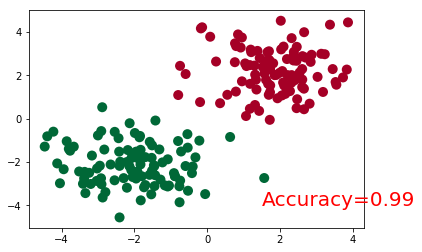

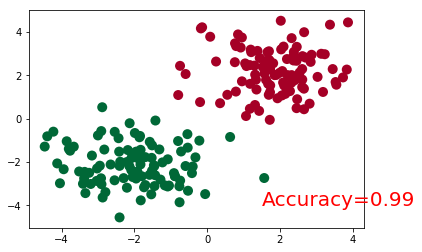

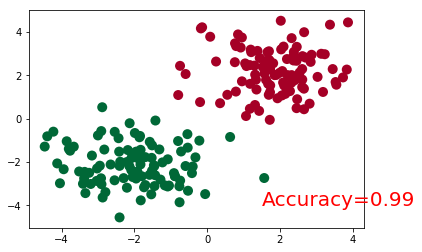

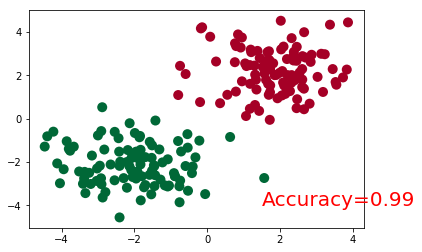

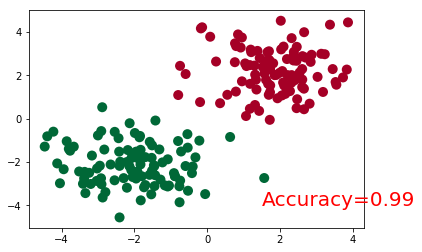

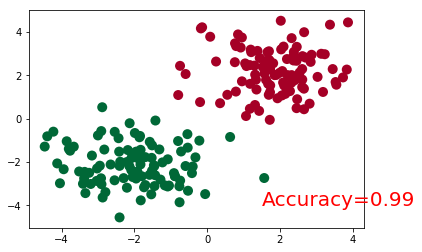

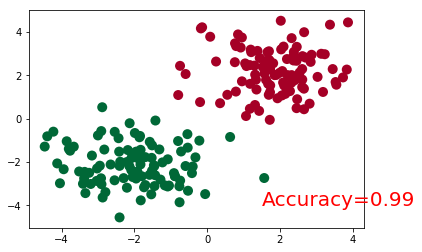

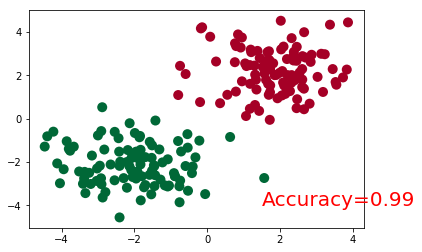

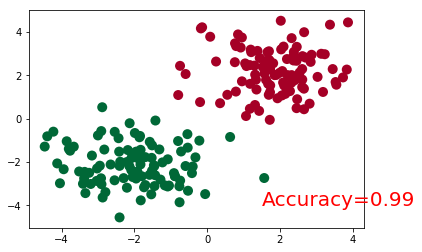

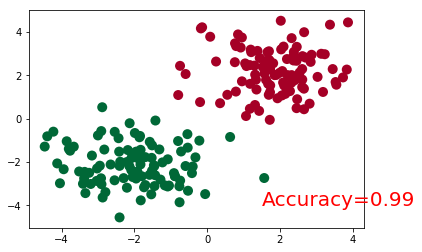

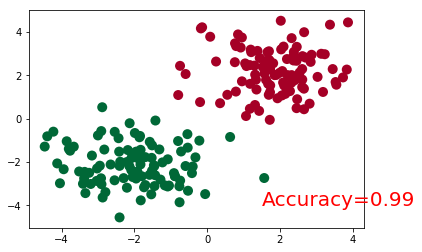

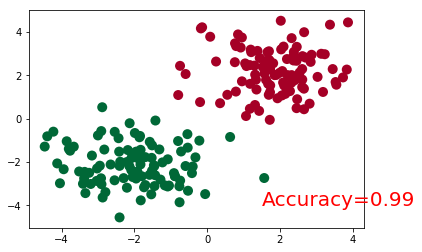

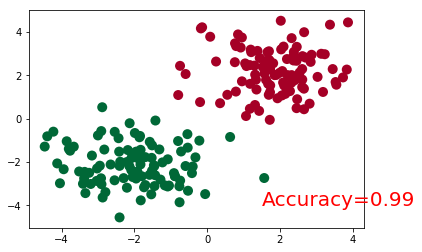

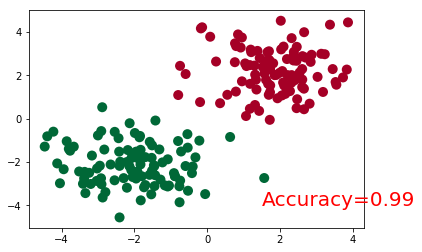

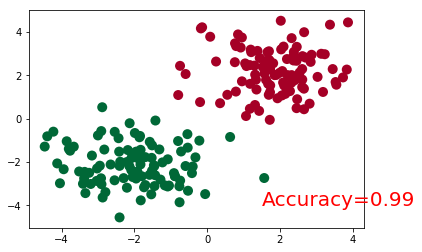

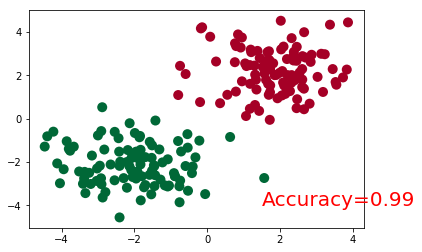

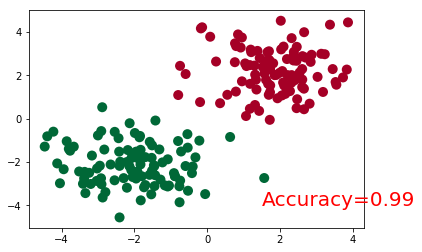

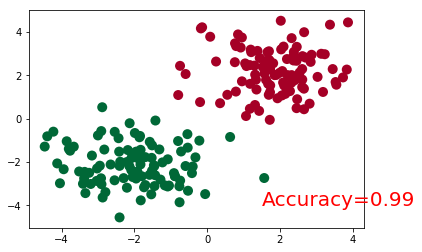

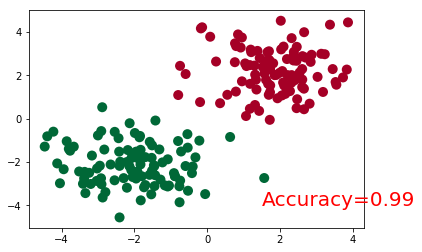

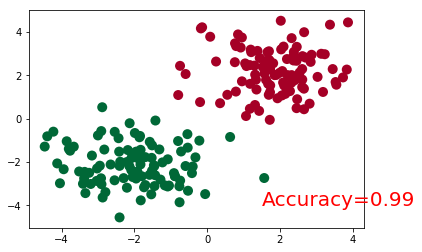

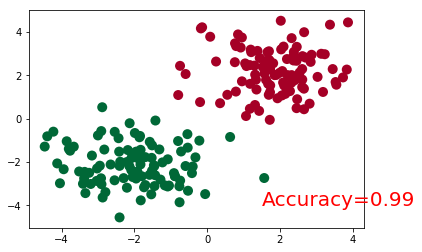

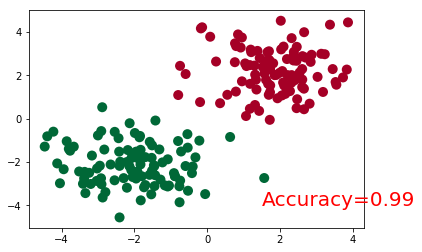

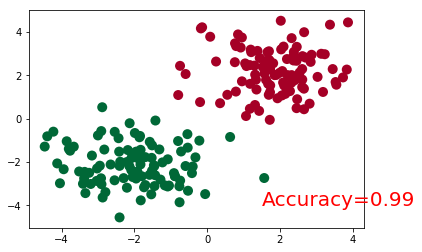

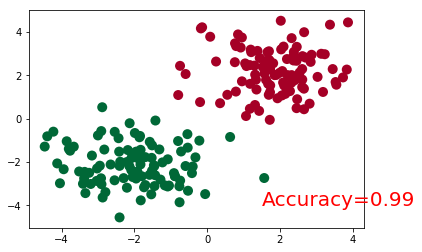

In [19]:
"""
View more, visit my tutorial page: https://morvanzhou.github.io/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou
Dependencies:
torch: 0.4
matplotlib
"""
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# torch.manual_seed(1)    # reproducible

# make fake data
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)      # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)     # class1 x data (tensor), shape=(100, 2)
y1 = torch.ones(100)                # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)    # shape (200,) LongTensor = 64-bit integer

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
# x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()